# Color Organ
### EE 16B: Designing Information Devices and Systems II, Fall 2017

**Name 1**: Amy Hung

**Login**: ee16b-afi


**Name 2**: Pratibha Sriram

**Login**: ee16b-ago

**Name 3**: Iris Chow

**Login**: ee16b-

## Table of Contents

* [Introduction](#intro)
* [Before You Begin: Tuning Your Micboard](#beforeyoubegin)
* [Task 0: Speaker-Microphone Frequency Response Data](#task0)
* [Task 1: The Bass Beats](#task1)
* [Task 2: Amplify the Mic](#task2)
* [Task 3: The Treble](#task3)
* [Task 4: The Midrange](#task4)

<a id='intro'></a>
## Introduction

Recall that in the last lab you built a low pass filter in order to determine the value of a mystery capacitor. In this lab, you will design several filters by choosing desired corner frequencies and calculating appropriate resistor and capacitor values. These filters will ultimately be used to flash LEDs in time to music - your very own color organ!

What is a color organ? It is your own lightshow circuit. Check it out here.

https://www.youtube.com/watch?v=x5hGF7NsG7Q

For our rendition, you will filter three ranges of audible frequencies to drive three LED's that flash in time to the music.

The audible range is actually a somewhat small spectrum of frequencies, especially when using only first-order filters (**why might this be a problem?**). Take a look at the image below to get an idea of what range of frequencies we will be working with.

<img style="width: 600px" src="images/aud-sptrm.jpg">

You will be targeting the Bass, Mid-range, and Treble sections. In the last lab, you measured the frequency response of the speaker-microphone system used in Color Organ. You may have seen that your speakers (phone, headpones, etc.) and the microphone don't create and pick up frequenicies as well on the far ends of the audible spectrum. However, we can compensate for this.

We will define the Bass, Mid-range, and Treble sections as follows:
- Bass: [0 Hz] - [100 ~ 500 Hz]
- Mid-range: [1200 ~ 1500 Hz] - [3500 ~ 5000 Hz]
- Treble: [6000 ~ 8000 Hz] - [$\infty$]

<span style="color:red">**Note that these frequency ranges are *guidelines*. The goal of the lab is to independently light up the 3 LED's using 3 different frequencies. You have freedom to choose (reasonable) cutoffs and amplifier gains. Remember that you measured the frequency response of your speaker-microphone system in the previous lab!**</span>

The final circuit will be more complex and have more components than circuits in previous labs. Our completed Color Organ will look something like this:

<img style="width: 500px" src="images/low-high-band-flow.png">

With a band-pass filter constructed like so:

<img style="width: 400px" src="images/RightFilter.png">

<span style="color:red">**Be sure to plan ahead when constructing your circuit.**</span>

**A few tips:**
- Use +5V and -5V rails on your breadboard. 
- Use short wires from the power rails to the closest holes in columns A or J on your breadboard.
- Connect all equipment grounds and your Launchpad grounds together.
- Layout your circuit in a way that matches the block diagram above. Examples:
    - Op amp outputs are on the top of the IC, and the inputs are on the bottom. The high-pass filter used in the band-pass filter should be below the buffer (the same side as pins 4 and 5 of the op amp).
    - The same op amp IC can be used for the band-pass buffer and for the band-pass amplifier.


<a id='beforeyoubegin'></a>
## <span style="color:blue">Before You Begin: Tuning Your Micboard</span>
**Setup:**
1. Start by making sure that your micboard is powered by **5V at VDD** and **-5V at VSS**.
2. Make sure **OS2 is grounded** and **OS1 is connected to ground by a 100K ohm** resistor.
3. Connect an oscilloscope cable to the output.
4. Display a **peak to peak measurement** for the current channel on the oscilloscope.

**Now you are ready to tune your micboard!**
1. **Play a pure tone in the midband range** on your phone at a reasonable volume. Make sure to point the speaker directly at the mic and hold it a few inches away from the mic.
2. Turn the potentiometer (with a screwdriver instead of your fingers for finer increments in gain) until you see an a sine wave with a **peak-to-peak around 5V** on your oscilloscope.

<span style="color:green">**Congratulations! You have successfully tuned your micboard!**</span>


<a id='task0'></a>
## <span style="color:blue">Task 0: Speaker-Microphone Frequency Response Data</span>

Copy your speaker-microphone frequency response data from last week's lab. You can refer to this for guidance on choosing gains for the amplifiers for individual bands.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

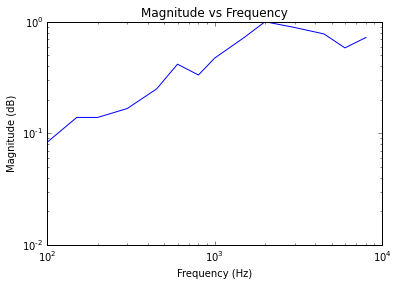

In [2]:
#Record the amplitude of the output sinusoid at each given frequency
f = [100, 150, 200, 300, 450, 600, 800, 1000, 1500, 2000, 3000, 4500, 6000, 8000]
Vpp = [.6, 1, 1, 1.2, 1.8, 3, 2.4, 3.4, 5.2, 7.2, 6.4, 5.6, 4.2, 5.2]

Vpp = np.array(Vpp)/max(Vpp)

p = plt.loglog(f, Vpp)
plt.title('Magnitude vs Frequency')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')

<a id='task1'></a>
## <span style="color:blue">Task 1: The Bass Beats</span>

### Materials
- Various Caps and Resistors

First, lets tackle the low-frequency sounds. You will begin by choosing a corner frequency for your low pass filter. Remember that in a first order low pass filter the amplitude of frequencies after the corner frequency are attenuated. The frequencies are attentuated slowly rather than zeroed out immediately, so frequencies that are close to the corner frequency might not be filtered as well as you want. The Bode plot below might be helpful in visualizing this:

<img style="width: 450px" src="images/LPF_Bode.png">

You may want to choose a corner frequency closer to the middle of the bass frequency range to make sure only the bass ones are making it through. 

<b>Pick a frequency in the range 100 - 200 Hz.</b>

Again, don't be afraid to change it later - you can always swap out a resistor to get the range you want.

Once you have chosen your desired frequency, look at what <b>capacitors</b> are included in your parts kit. Since we have far more resistor values than we have capacitors values, you should choose an easy capacitor value. Try to pick one that that lets you choose resistors in the $1k-10k\Omega$ range.

(Hint: remember that, for Hertz, $f_c = \frac{1}{2\pi R C}$.)

In [5]:
Cornerfreq = 160 #YOUR VALUE HERE
C = .000001 #YOUR VALUE HERE

R = 1000 #YOUR CODE HERE

print("Resistor: ", R)
print("Capacitor: ", C)

Resistor:  1000
Capacitor:  1e-06


Now that you have selected your RC values, build the low pass filter on your breadboard. Remember that we will have three different filters, so budget your space accordingly! 

**<span style="color:red">Test your filter with the signal generator and your oscilloscope to make sure that the corner frequency is what you expected.</span>**

This part is very important! Suppose you were to build the entire Color Organ in one go, and then we found out the filters seemed to not be working correctly. It would be really difficult to figure out which one is causing the problem!

<a id='task2'></a>
## <span style="color:blue">Task 2: Amplify the Filter Output</span>

### Materials
- Task 1 setup
- Various Caps and Resistors
- Op-amp

After filtering, you might find that the signal isn't quite large enough to turn on the LEDs reliably - we can fix this with amplification.

Build a non-inverting amplifier with a gain of 2 - you may need to change the gain later depending on your setup and the music you want to play, and it might become a buffer in the end. Use the same rail voltages as the mic board (+/-5V). Remember that the output voltage needs in the range of Volts, and different LEDs will require different amounts of voltage to turn them on.

Connect the output of your filter to the input of your amplifier, and the output of your amplifier to a 10 $\Omega$ resistor and LED as shown below.

<img style="width: 600px" src="images/low-pass-flow.png">


Hook up the output of your micboard up as the input of your low pass filter. Once you have built the circuit, make some noises at your microphone. Does the LED flash? Try playing some different frequencies from <a href='http://www.szynalski.com/tone-generator/'>this tone generator website</a> and make sure the LED lights up for lower tones rather than high ones. It may be easier to see this on a scope, so don't forget to probe the output too.

**If the LED doesn't turn on then you may need more gain or your filter corner might be too low.**

**Refer back to the frequency response you measured in the previous lab to see how you may need to adjust the gain or cutoff frequency.**

<a id='task3'></a>
## <span style="color:blue">Task 3: The Treble</span>

### Materials
- Task 2 setup
- Various Caps and Resistors
- Opamp
- Mic board

Next, we will work with the high frequency sounds. Choose an appropriate corner frequency for a high pass filter. Again, because the frequencies are attentuated slowly in a first order filter, so you may want to choose a corner frequency closer to the middle of the High Frequencies range. Remember you can always change your corner frequency later.

<b>Pick a frequency in the range 6000 - 8000 Hz.</b>

Again, don't be afraid to change it later - you can always swap out a resistor to get the range you want.

Once you have selected a corner frequency, repeat the analysis in Task 1 to choose a capacitor and resistor value.

In [ ]:
Cornerfreq = 7000 #YOUR VALUE HERE
C = 0 #YOUR VALUE HERE

R = 0 #YOUR CODE HERE

print("Resistor: ", R)
print("Capacitor: ", C)

Build a high pass filter with the cutoff frequency you've chosen. <b>Make sure to test your filter with the function generator to ensure the cutoff frequency is in the right place. </b> Follow your filter with another non-inverting amplifier and LED/resistor just like before.

<b>Without disconnecting your low pass filter </b>, use the function generator instead of the mic board as the input to your circuit. Don't remove the mic board - just disconnect the wire from OUT! Vary the frequency of the signal from the function generator: does only one LED turn on at a time?

Now, use your micboard instead of the function generator. You should now have something that looks like this:

<img style="width: 600px" src="images/low-high-flow.png">


Check that your amplifier and filter work as expected by playing some tones from the generator website. Do the LEDs still light up at different times? 

Try playing some music to your very basic color organ and watch it flash in time to the music! Feel free to mix up your gain and corner frequencies to make the LEDs more sensitive if you don't like how they look.

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT FOR WEEK 1</span>

<span style="color:green">Show your GSI your Bass and Treble LEDs flashing independently to varying frquencies.</span>
 
# <span style="color:red">KEEP YOUR CIRCUIT FOR NEXT WEEK! YOU WILL NEED IT!</span>

<a id='task3'></a>
## <span style="color:blue">Task 4: The Midrange</span>

### Materials
- Task 3 setup
- Various Caps and Resistors
- Opamps
- Mic board

Now that you have taken care of the bass and treble, lets work on the middle frequencies. This time, we will need to build a band-pass filter. Think about the filters you built in Tasks 1 and 3 and how they can be combined to make a bandpass filter. We want to cut out low and high frequencies, but leave the middle intact. Think about how we can combine a low pass and high pass filter to achieve this affect.

However, there is one thing we need to keep in mind while building this filter - we can't just connect two first order filters together. Lets consider what would happen if we connected our high pass filter directly to a low pass filter.

<img style="width: 400px" src="images/WrongFilter_withX.png">

Using our impedence analysis, we can analyze this system, and we'll find the the cut-off frequency isn't what we want.

Our usual analysis of an RC filter assumes an ideal voltage source is connected to the input, and nothing is connected to the output. What tool do we have with high input impedence and low output impedance? 

The correct way to set up your band-pass filter is to use a buffer between the first and second filter:
<img style="width: 500px" src="images/RightFilter.png">

Some extra design considerations to keep in mind:
- Most music is composed of midrange frequencies, which means they will be your strongest signals. You may want less gain in the mid-range.
- You are using first order filters, so you will want to choose a narrower band of mid-range frequencies rather than the same cut-off frequencies as the high and low bands.

Pick your cutoff frequencies:
- for your high pass filter in the range of 800 ~ 1000 Hz
- for your low pass filter in the range of 3000 ~ 5000 Hz

Chose your capacitor and resistor values just like you did for the other filters.

In [2]:
#YOUR CODE HERE

print("Resistor Low: ", 51)
print("Capacitor Low: ", C1)
print("Resistor High: ", R2)
print("Capacitor High: ", C2)

Resistor Low:  51


NameError: name 'C1' is not defined

Again, build <b>TWO NEW</b> filters and test each cutoff frequency with the function generator. Then, connect the two filters with the buffer as shown above. Test this combination with the function generator too - make sure that only mid-range frequencies are making it through.

(Hint: If the behavior isn't quite right, make sure that your high pass filter has the <i>lower </i> cutoff frequency)

**<span style="color:red">Build a third non-inverting amplifier (again, you can choose the gain) and connect the output to a 10 $\Omega$ resistor and an LED.</span>**

Hook up your band pass filter in parallel with the others, and use the output of your mic board as an input for your band pass filter.

Remember, the color organ will perform differently for different types of music. A classical song will have a different spectrum from a dubstep song. Feel free to tweak your corner frequencies and gains to suit the songs your LEDs are jamming out to.  

## LED Troubleshooting
There are a couple of cases when your LEDs don't seem to be working correctly:
- If your LEDs are turning on, but are not very bright, try increasing the gain of your non-inverting amplifiers
- If your LEDs are turning on, but not all that often, try changing your corner frequencies to increase the range of the Bass/Mid Band/Treble filters
- If your LED never turns off, try switching the current limiting resistor from $10\Omega$ to $100\Omega$ 

<img width='30px' align='left' src="http://inst.eecs.berkeley.edu/~ee16b/sp16/lab_pics/check.png">
<br/>
## <span style="color:green">CHECKPOINT 2</span>
 <span style="color:green">Show your GSI your working color organ!</span>
 
Congratulations, you have built a working color organ! Time to party.